In [1]:
# goal: figure out why <H> isn't returning the constant E that's chosen
# set E=const, get zs and phis, make sure they give right energy, exptval of H, why not equal to E??

# getZs_Ec is fine, <H1> is fine for all the z/phi pairs
# check: <H1> for different E vals, Jz_1(t) for different z/phi (original code)
# check if Ji_1(t)s convert to same/right z(t)

In [1]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_general, tensor_basis
from quspin.tools.measurements import obs_vs_time
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

import spinFuncts as sf

In [18]:
N  = 1        #system size
V  = 0        #coupling strength
L  = [10, 0]   #lambda prefix, Jzz_i

S1 = '100'    #spin of 1
S2 = '1/2'    #spin of 2

s1 = 100
s2 = 1/2

E=.8

In [20]:
times = np.linspace(0.0, 200.0, 1000)
phis = [0, .5, 1, 1.5, 2, 2.094]
#phis = [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2, 5*np.pi/8, 3*np.pi/4, 7*np.pi/8, np.pi]
zs   = sf.getZs_Ec(phis, L[0], E)
print(zs)

[0.569553236445743, 0.5533500438732551, 0.5033611662733157, 0.415772358865459, 0.2831552037261775, 0.2515592380896736]


In [21]:
h1, h2 = sf.takeZphi (zs[0], phis[0], 0, 0)
J1, J2, zz = sf.getJs(N, S1, S2, h1, h2)
H1 = sf.H_ini(h1, h2, J1, J2)
vals, vects = H1.eigh()

phi1 = 0
z1   = 0
phi2 = 0
z2   = 0

h1, h2 = sf.takeZphi (z1, phi1, z2, phi2)
J1, J2, Jzz = sf.getJs(N, S1, S2, h1, h2)

H2 = sf.H_dyn(h1, h2, L, V, J1, J2, Jzz, s1, s2)

v_t = H2.evolve(vects.T[0], t0=0, times=times)

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


In [22]:
print(zs[1], phis[1])

h1, h2 = sf.takeZphi(zs[1], phis[1], 0, 0)

print(h1,h2)
print(sf.makeZphi_h (h1, h2))
# correct z/phi up to this point

J1, J2, zz = sf.getJs(N, S1, S2, h1, h2)
H1 = sf.H_ini(h1, h2, J1, J2)
vals, vects = H1.eigh()
    
phi1 = 0
z1   = 0
phi2 = 0
z2   = 0

h1, h2 = sf.takeZphi (z1, phi1, z2, phi2)

print(h1,h2)

0.5533500438732551 0.5
[0.7309813552733805, 0.39933693441523616, 0.5533500438732551] [1.0, 0.0, 0]
([0.5533500438732551, 0.0], [0.5, 0.0])
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
[1.0, 0.0, 0] [1.0, 0.0, 0]


Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
dict_keys(['Jx_1', 'Jy_1', 'Jz_1', 'Jx_2', 'Jy_2', 'Jz_2', 'psi_t'])
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:50: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in ha

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
dict_keys(['Jx_1', 'Jy_1', 'Jz_1', 'Jx_2', 'Jy_2', 'Jz_2', 'psi_t'])
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:50: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in ha

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
dict_keys(['Jx_1', 'Jy_1', 'Jz_1', 'Jx_2', 'Jy_2', 'Jz_2', 'psi_t'])
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:50: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in ha

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
dict_keys(['Jx_1', 'Jy_1', 'Jz_1', 'Jx_2', 'Jy_2', 'Jz_2', 'psi_t'])


C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


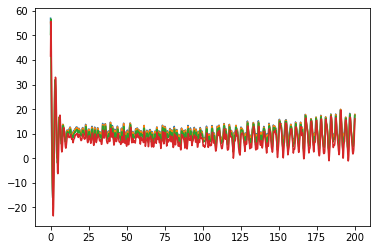

In [23]:
J1_t, J2_t = sf.evolveSys_Js(zs[0], phis[0], 0, 0, times, S1, s1, S2, s2, L, V, N)
plt.plot(times,J1_t[2])
J1_t, J2_t = sf.evolveSys_Js(zs[1], phis[1], 0, 0, times, S1, s1, S2, s2, L, V, N)
plt.plot(times,J1_t[2])
J1_t, J2_t = sf.evolveSys_Js(zs[2], phis[2], 0, 0, times, S1, s1, S2, s2, L, V, N)
plt.plot(times,J1_t[2])
J1_t, J2_t = sf.evolveSys_Js(zs[3], phis[3], 0, 0, times, S1, s1, S2, s2, L, V, N)
plt.plot(times,J1_t[2])

C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


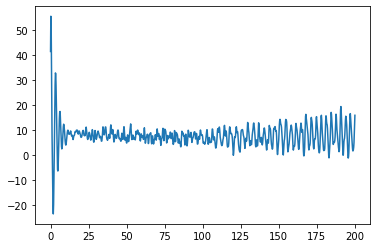

In [24]:
plt.plot(times,J1_t[2])

In [25]:
z1, phi1, a, b = sf.makeZphi_J(J1_t, J2_t)

C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


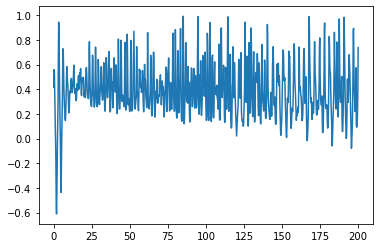

In [26]:
# get Js, convert to z/phi to see if correct
# why all weird??
plt.plot(times,z1)

In [27]:
for i in range(len(phis)):
    H2, vect0 = sf.H2_vects(zs[i], phis[i], 0, 0, S1, s1, S2, s2, L, V, N)
    print (H2.expt_value(vect0)/s1)

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:50: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
  H2 = hamiltonian(static2, [], dtype=np.complex128, basis=basis) #to make operators for 2
C:\Users\Rey\Desktop\code\spinFuncts.py:50: UserWarning: Test for particle conservation not implemented for <c

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
(0.8068902277711584+0j)
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
(0.8073450932229497+2.2513699516051468e-17j)
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
(0.8086656884072143-2.992080972453073e-17j)
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Her

In [28]:
print(sf.energy(zs[5], phis[5], L[0]))

0.7999999999999661


In [16]:
h1, h2 = sf.takeZphi(zs[1], phis[1], 0, 0)
print(h1)
print(np.arctan2(h1[1], h1[0]))

zi, phii = sf.makeZphi_h (h1, h2)
print(phii)

[0.75908736982688, 0.4146913201453987, 0.5018141827064835]
0.5
[0.5, 0.0]
